# Import Libraries
<hr>

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import classification_report, confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score


# Load data from csv file

In [2]:
df = pd.read_csv("class_ml.csv")
df[0:20]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


<h1>Data Visualization and Analysis</h1>

In [3]:
df[-20:]

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'cp'}>,
        <Axes: title={'center': 'trtbps'}>],
       [<Axes: title={'center': 'chol'}>,
        <Axes: title={'center': 'fbs'}>,
        <Axes: title={'center': 'restecg'}>,
        <Axes: title={'center': 'thalachh'}>],
       [<Axes: title={'center': 'exng'}>,
        <Axes: title={'center': 'oldpeak'}>,
        <Axes: title={'center': 'slp'}>, <Axes: title={'center': 'caa'}>],
       [<Axes: title={'center': 'thall'}>,
        <Axes: title={'center': 'output'}>, <Axes: >, <Axes: >]],
      dtype=object)

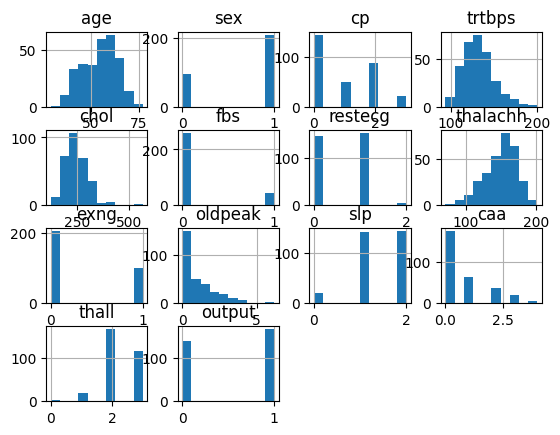

In [4]:
df.hist()

# Define feature sets

In [5]:
features_df = df[["age", "sex", "cp", "trtbps", "chol", "fbs", "restecg", "thalachh","exng", "oldpeak", "slp", "caa", "thall"]].values
X = np.asarray(features_df)
X[0:5]

array([[ 63. ,   1. ,   3. , 145. , 233. ,   1. ,   0. , 150. ,   0. ,
          2.3,   0. ,   0. ,   1. ],
       [ 37. ,   1. ,   2. , 130. , 250. ,   0. ,   1. , 187. ,   0. ,
          3.5,   0. ,   0. ,   2. ],
       [ 41. ,   0. ,   1. , 130. , 204. ,   0. ,   0. , 172. ,   0. ,
          1.4,   2. ,   0. ,   2. ],
       [ 56. ,   1. ,   1. , 120. , 236. ,   0. ,   1. , 178. ,   0. ,
          0.8,   2. ,   0. ,   2. ],
       [ 57. ,   0. ,   0. , 120. , 354. ,   0. ,   1. , 163. ,   1. ,
          0.6,   2. ,   0. ,   2. ]])

In [6]:
result_df = df[["output"]].values
Y = np.asarray(result_df)
Y[:5]
Y=Y.ravel()

# Normalizing our data

In [7]:
scaler = StandardScaler().fit(X)
X = scaler.transform(X.astype(float))
X

array([[ 0.9521966 ,  0.68100522,  1.97312292, ..., -2.27457861,
        -0.71442887, -2.14887271],
       [-1.91531289,  0.68100522,  1.00257707, ..., -2.27457861,
        -0.71442887, -0.51292188],
       [-1.47415758, -1.46841752,  0.03203122, ...,  0.97635214,
        -0.71442887, -0.51292188],
       ...,
       [ 1.50364073,  0.68100522, -0.93851463, ..., -0.64911323,
         1.24459328,  1.12302895],
       [ 0.29046364,  0.68100522, -0.93851463, ..., -0.64911323,
         0.26508221,  1.12302895],
       [ 0.29046364, -1.46841752,  0.03203122, ..., -0.64911323,
         0.26508221, -0.51292188]])

# Train & Test split

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.19, random_state = 5)
print ("Train: ", x_train.shape, y_train.shape)
print ("Test: ", x_test.shape, y_test.shape)

Train:  (245, 13) (245,)
Test:  (58, 13) (58,)


<h1>Classification:</h1>
<br>
<h2>KNN</h2>
<h3> K nearest neighbor </h3>

as the first try, lets say k equals with 6!

In [9]:
k = 6
knn_model = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
knn_model

KNeighborsClassifier(n_neighbors=6)

# Prediction

In this level, we use our KNN mode to predict on the test set

In [10]:
yhat = knn_model.predict(x_test)
yhat[0:5]


array([1, 0, 0, 0, 1], dtype=int64)

In [11]:
print("Train accuracy: ", metrics.accuracy_score(y_train, knn_model.predict(x_train)))
print("Test accuracy: ", metrics.accuracy_score(y_test, yhat))

Train accuracy:  0.8612244897959184
Test accuracy:  0.896551724137931


# Is it ok to model with a single value for k?

# Absolutely not!

### by various values for K, the result of our prediction will be different!
### so not only we don't use a single value, but also we use a loop to check Ks in range 1 to 10 in order to find the best result!

In [12]:
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for k in range(1,Ks): 
    
    neigh = KNeighborsClassifier(n_neighbors = k).fit(x_train, y_train)
    yhat = neigh.predict(x_test)
    mean_acc[k-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[k-1] = np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.75862069, 0.79310345, 0.82758621, 0.82758621, 0.87931034,
       0.89655172, 0.9137931 , 0.9137931 , 0.93103448])

### Plot the model accuracy

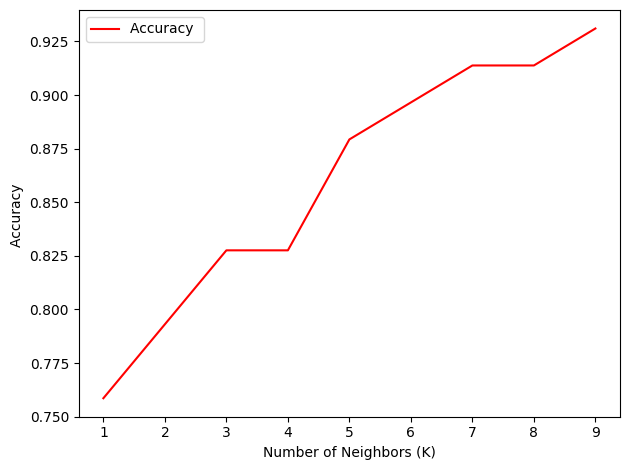

In [13]:
plt.plot(range(1, Ks), mean_acc, 'r')
plt.legend(('Accuracy ',))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [14]:
print("Best accuracy: ", mean_acc.max())
print("Best K: ", mean_acc.argmax() + 1)

Best accuracy:  0.9310344827586207
Best K:  9


# Defining a function to plot confusion matrix

In [15]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Use the plot_confusion_matrix function to plot a cnf base on our data

              precision    recall  f1-score   support

           0       0.93      0.93      0.93        28
           1       0.93      0.93      0.93        30

    accuracy                           0.93        58
   macro avg       0.93      0.93      0.93        58
weighted avg       0.93      0.93      0.93        58

Confusion matrix, without normalization
[[26  2]
 [ 2 28]]


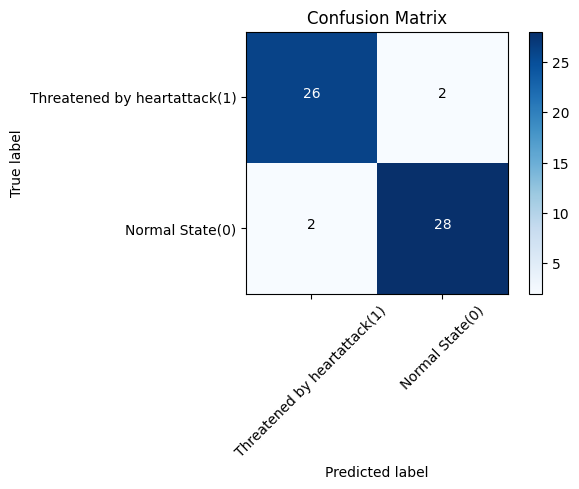

In [16]:
conf_matrix = confusion_matrix(y_test, yhat, labels = [0,1])
np.set_printoptions(precision=5)
report = classification_report (y_test, yhat)
print(report)
plt.figure()
plot_confusion_matrix (conf_matrix, classes=["Threatened by heartattack(1)","Normal State(0)"], normalize = False, title = "Confusion Matrix")

# Evaluate base on f1_score

### the f1_score will vary if we change the K! the following result is the best one I could achieve by trying various values for K

In [17]:
f1_score (y_test, yhat, average= "weighted")

0.9310344827586207

# Evaluate base on jaccard_score

### In jaccard_score evaluation we cac get the percentage of our success!

in this model, 87.5% of situations the model is predictinc great without any kind of problem.

In [18]:
jaccard_score (y_test, yhat, pos_label=1)

0.875